In [13]:
#block 1: import all important libraries

%matplotlib inline
from netCDF4 import Dataset
from netCDF4 import num2date
from matplotlib.pyplot import figure, pcolor, colorbar, xlabel, ylabel, title, draw, quiver, show
import numpy as np
import matplotlib.pyplot as plt 
import scipy.io as sio
import pandas as pd
import numpy as np
import numpy.ma as ma
from math import sqrt 

In [14]:
#block 2: Import the used data file and create a variable with the data in the file
#adcp 200
data2 = "/home/z3525831/Data/IMOS_ANMN-NRS_AETVZ_20120325T002056Z_SEQ200-SubSurface_FV01_SEQ200-SubSurface-120325-Workhorse-ADCP-110_END-20130606T202300Z_C-20131119T020203Z.nc"
ADCP200 = Dataset(data2)  

#adcp400
data4 = "/home/z3525831/Data/IMOS_ANMN-NRS_AETVZ_20120324T214125Z_SEQ400-SubSurface_FV01_SEQ400-SubSurface-120325-Workhorse-ADCP-110_END-20130606T215200Z_C-20131119T020507Z.nc"
ADCP400 = Dataset(data4)

#adcp100
data = sio.loadmat('/media/z3525831/Transcend/UNSW/DATA ADCP/CH100_nostructure.mat')

#adcpeac1
dataeac1 = "http://thredds.aodn.org.au/thredds/dodsC/IMOS/ABOS/DA/EAC1/Velocity/IMOS_ABOS-DA_AETVZ_20120421T130000Z_EAC1_FV01_EAC1-2012-WORKHORSE-ADCP-422_END-20130823T213855Z_C-20141016T011230Z.nc"
ADCPeac1 = Dataset(dataeac1)

In [15]:
#block 3: Extracting the U/V/lat/long/time/H_B_S/qc data from the import file and assigns them to a variable

# adcp 200
#basic data 
LAT2 = ADCP200.variables['LATITUDE']
LON2 = ADCP200.variables['LONGITUDE']
TIMES2 = ADCP200.variables['TIME']
DEPTH2 = ADCP200.variables['DEPTH']
V2 = ADCP200.variables['VCUR']
U2 = ADCP200.variables['UCUR']
W2 = ADCP200.variables['WCUR']
Wheight2 = ADCP200.variables['HEIGHT_ABOVE_SENSOR']
#quality control
hasqc2 = ADCP200.variables['HEIGHT_ABOVE_SENSOR_quality_control']
Vqc2 = ADCP200.variables['VCUR_quality_control']
Uqc2 = ADCP200.variables['UCUR_quality_control']
Dqc2 = ADCP200.variables['DEPTH_quality_control']
tqc2 = ADCP200.variables['TIME_quality_control']

#adcp400
LAT4 = ADCP400.variables['LATITUDE']
LON4 = ADCP400.variables['LONGITUDE']
TIMES4 = ADCP400.variables['TIME']
DEPTH4 = ADCP400.variables['DEPTH']
V4 = ADCP400.variables['VCUR']
U4 = ADCP400.variables['UCUR']
W4 = ADCP400.variables['WCUR']
Wheight4 = ADCP400.variables['HEIGHT_ABOVE_SENSOR']
#quality control
hasqc4 = ADCP400.variables['HEIGHT_ABOVE_SENSOR_quality_control']
Vqc4 = ADCP400.variables['VCUR_quality_control']
Uqc4 = ADCP400.variables['UCUR_quality_control']
Dqc4 = ADCP400.variables['DEPTH_quality_control']
tqc4 = ADCP400.variables['TIME_quality_control']

#adcp100
data_U = data['U']
data_V = data['V']
data_depthV = data['depthV']
data_t = data['t']
data_timeDV = data['timeDV']                                          
data_u25 = data['u25']                            
data_u55 = data['u55']
data_u90 = data['u90']
data_v25 = data['v25']
data_v55 = data['v55']
data_v90 = data['v90']



#adcpeac1
LATeac1 = ADCPeac1.variables['LATITUDE']
LONeac1 = ADCPeac1.variables['LONGITUDE']
TIMESeac1 = ADCPeac1.variables['TIME']
DEPTHeac1 = ADCPeac1.variables['DEPTH']
Veac1 = ADCPeac1.variables['VCUR']
Ueac1 = ADCPeac1.variables['UCUR']
Weac1 = ADCPeac1.variables['WCUR']
Wheighteac1 = ADCPeac1.variables['HEIGHT_ABOVE_SENSOR']

hasqceac1 = ADCPeac1.variables['HEIGHT_ABOVE_SENSOR_quality_control']
Vqceac1 = ADCPeac1.variables['VCUR_quality_control']
Uqceac1 = ADCPeac1.variables['UCUR_quality_control']
Dqceac1 = ADCPeac1.variables['DEPTH_quality_control']
tqceac1 = ADCPeac1.variables['TIME_quality_control']

In [16]:
#block 4: Convert the ADCP time serie dataset (Matlab to python time serie: yyyy/mm/dd hh/mm/ss)

#adcp 200
units2 = ADCP200.variables['TIME'].units
calendar2 = ADCP200.variables['TIME'].calendar
times2 = num2date(ADCP200.variables['TIME'][:], units=units2, calendar=calendar2)

#adcp400
units4 = ADCP400.variables['TIME'].units
calendar4 = ADCP400.variables['TIME'].calendar
times4 = num2date(ADCP400.variables['TIME'][:], units=units4, calendar=calendar4)

#adcp100
def matlab2datetime(matlab_datenum):
    day = dt.datetime.fromordinal(int(matlab_datenum))                         
    dayfrac = dt.timedelta(days=matlab_datenum%1) - dt.timedelta(days = 366) 
    return day + dayfrac
t = data_t[0,:]



#adcpeac1
unitseac1 = ADCPeac1.variables['TIME'].units
calendareac1 = ADCPeac1.variables['TIME'].calendar
timeseac1  = num2date(ADCPeac1.variables['TIME'][:], units=unitseac1, calendar=calendareac1)

In [17]:
#block 5: Creat variable with ADCP dataset 


#adcp200
#For the basic data
dph2 = DEPTH2[:,0,0]
latData2 =  LAT2[:]      
lonData2 = LON2[:]       
Wcolumn2 = Wheight2[:]   
data_u2 = U2 [:,:,:,:]
data_v2 = V2 [:,:,:,:]
v2d2 = data_v2[:,:,0,0]
u2d2 = data_u2[:,:,0,0]
#For the quality controle data 
hasqc12 = hasqc2[:]
Vqc12 = Vqc2[:,:,0,0]
Uqc12 = Uqc2[:,:,0,0]
Dqc12 = Dqc2[:,0,0]



#adcp400
#For the basic data
dph4 = DEPTH4[:,0,0]
latData4 =  LAT4[:]      
lonData4 = LON4[:]       
Wcolumn4 = Wheight4[:]   
data_u4 = U4 [:,:,:,:]
data_v4 = V4 [:,:,:,:]
v2d4 = data_v4[:,:,0,0]
u2d4 = data_u4[:,:,0,0]
#For the quality controle data 
hasqc14 = hasqc4[:]
Vqc14 = Vqc4[:,:,0,0]
Uqc14 = Uqc4[:,:,0,0]
Dqc14 = Dqc4[:,0,0]



#adcp100
import datetime as dt
py_t = [matlab2datetime(tval) for tval in t]
V = (data_U*data_U) + (data_V*data_V)
Vf = np.sqrt(V)                        
P = 0.5 * 1025 * 4 * (Vf*Vf*Vf)    
Pf = P/1000                    
Pmd = np.nanmean(Pf,axis=1) 



#adcpeac1
latDataeac1 =  LATeac1[:]      #ADCP position
lonDataeac1 = LONeac1[:]       #ADCP position
W2eac1 = Weac1 [:,:,:,:] #[time,Wheight,lat,long] 4dimesion
Wcolumneac1 = Wheighteac1[:]   #each 8m; start at 10m to the bottom and look to the surface
data_ueac1 = Ueac1 [:,:,:,:]
data_veac1 = Veac1 [:,:,:,:]
dpheac1 = DEPTHeac1[:,0,0]
v2deac1 = data_veac1[:,:,0,0]
u2deac1 = data_ueac1[:,:,0,0]


hasqc1eac1 = hasqceac1[:]
Vqc1eac1 = Vqceac1[:,:,0,0]
Uqc1eac1 = Uqceac1[:,:,0,0]
Dqc1eac1 = Dqceac1[:,0,0]

In [18]:
#block 6: Mask the wrong values and creat a new variable with the good values.

#adcp200
hasqc22 = ma.masked_where (hasqc12 != 4, Wcolumn2)
Dqc22 = ma.masked_where (Dqc12 != 1, dph2)
Vqc22 = ma.masked_where (Vqc12 != 1,v2d2)
Uqc22 = ma.masked_where (Uqc12 != 1,u2d2 )



#adcp400
hasqc24 = ma.masked_where (hasqc14 != 4, Wcolumn4)
Dqc24 = ma.masked_where (Dqc14 != 1, dph4)
Vqc24 = ma.masked_where (Vqc14 != 1,v2d4)
Uqc24 = ma.masked_where (Uqc14 != 1,u2d4)


#adcpeac1
#block 6: Mask the wrong values and creat a new variable with the good values.
hasqc2eac1 = ma.masked_where (hasqc1eac1 != 4, Wcolumneac1)
Dqc2eac1 = ma.masked_where (Dqc1eac1 != 1, dpheac1)
Vqc2eac1 = ma.masked_where (Vqc1eac1 != 1,v2deac1)
Uqc2eac1 = ma.masked_where (Uqc1eac1 != 1,u2deac1 )

In [19]:
#block 6: reshape the depth of the mooring(dph) and the depth above the sensor(Wcolumn) for have the same shape.


#adcp200
dph142=np.kron(np.ones((14,1)),Dqc22) # repeated the dph 14 times to match size of v2d.
dph14f2 = ma.masked_where (dph142 < 0,dph142)
Wtime2=np.kron(np.ones((20832,1)),hasqc22)


#adcp400
dph144=np.kron(np.ones((14,1)),Dqc24) # repeated the dph 14 times to match size of v2d.
dph14f4 = ma.masked_where (dph144 < 0,dph144)
Wtime4=np.kron(np.ones((20833,1)),hasqc24)

#adcpeac1
dph14eac1=np.kron(np.ones((30,1)),Dqc2eac1) # repeated the dph 14 times to match size of v2d.
dph14feac1 = ma.masked_where (dph14eac1 < 0,dph14eac1)
Wtimeeac1=np.kron(np.ones((11886,1)),hasqc2eac1)

In [20]:
#block 7: Creation of the real depth variable.

#adcp200
DepthReal2 = dph14f2-Wtime2.T


#adcp400
DepthReal4 = dph14f4-Wtime4.T

#adcpeac1

DepthRealeac1 = dph14feac1-Wtimeeac1.T

In [21]:
#block 8: Creat new variable for the study depth.

#adcp200
depthBin32 = np.array([50,60,70,80,90,100])

#adcp400
depthBin24 = np.array([40,60,80,100,120,140,160,180,200])

#adcp100
depthBin1 = np.array([-13,-17,-21,-25,-29,-33,-37,-41,-45,-49,-53,-57,-61,-65,-69,-73,-77,-81,-85,-89])

#limit
limit = np.array([0.5,0.5,0.5,0.5,0.5,0.5])
depthBinlim = np.array([-205,-200,-150,-100,-50,0])

limit2 = np.array([0,0.2,0.4,0.6,0.8,1.0,1.2])
depthBinlim2 = np.array([-50,-50,-50,-50,-50,-50,-50])


#adcpeac1
#block 8: Creat new variable for the study depth.
depthBineac1 = np.array([80,100,120,140,160,180,200,220,240,260,280,300,320,340,360,380,400,420,440,460])
depthBineac2 = np.array([100,120,140,160,180,200,220,240,260,280,300,320,340,360,380,400,420,440,460])


In [22]:
#block 9: Creat the mean Speed and Power variable with U and V.

#adcp200
Speed2 = (Uqc22*Uqc22) + (Vqc22*Vqc22)
Speedf2 = np.sqrt(Speed2) 
P2 = 0.5 * 1025 * 4 * (Speedf2*Speedf2*Speedf2)     
Pf2 = P2/1000


#adcp400
Speed4 = (Uqc24*Uqc24) + (Vqc24*Vqc24)
Speedf4 = np.sqrt(Speed4) 
P4 = 0.5 * 1025 * 4 * (Speedf4*Speedf4*Speedf4)     
Pf4 = P4/1000

#adcpeac1
#block 16: Creat the mean Power variable.
Speedeac1 = (Uqc2eac1*Uqc2eac1) + (Vqc2eac1*Vqc2eac1)
Speedfeac1 = np.sqrt(Speedeac1)  
Peac1 = 0.5 * 1025 * 4 * (Speedfeac1*Speedfeac1*Speedfeac1)     
Pfeac1 = Peac1/1000

/home/z3525831/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """
/home/z3525831/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in sqrt
  if sys.path[0] == '':
/home/z3525831/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in sqrt


In [27]:
#block 10: Use the loop to have mean Power depending on the depth.

#adcp200
Pfm2 = [ ]
for i in range(40,100,10):
   
    vi2= Pf2[np.where((DepthReal2.T > i) & (DepthReal2.T < i+10))]  
    #print(np.shape(vi2))
    #print(np.mean(vi2))
    #print(np.std(vi)) 
    Pfm2.append(( np.mean(vi2)))
    
    
#adcp400
Pfm4 = [ ]
for i in range(20,200,20):
   
    vi4= Pf4[np.where((DepthReal4.T > i) & (DepthReal4.T < i+10))]  
    #print(np.shape(vi4))
    #print(np.mean(vi4))
    #print(np.std(vi)) 
    Pfm4.append(( np.mean(vi4)))
    
#adcpeac1    
Pfeac1m = [ ]
for i in range(100,480,20):
   
    vieac1= Pfeac1 [np.where((DepthRealeac1.T > i) & (DepthRealeac1.T < i+10))]  
    #print(np.shape(vieac1))
    #print(np.mean(vieac1))
    #print(np.std(veac1)) 
    Pfeac1m.append(( np.mean(vieac1)))

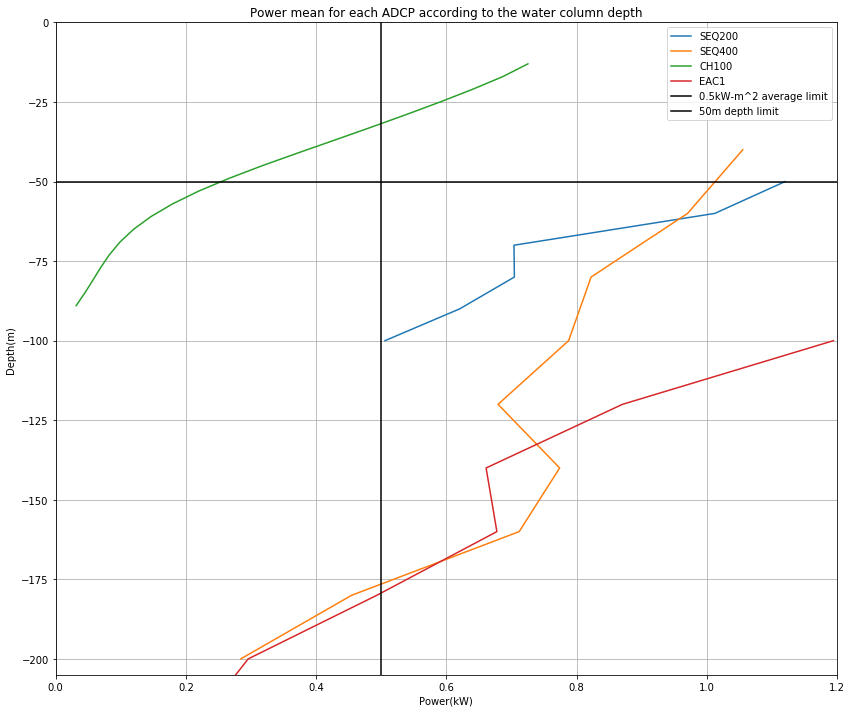

In [31]:
#block 11: Plot the graph

plt.rcParams['figure.figsize'] = (14,12) 
plt.xlabel("Power(kW)")             
plt.xlim(0,1.2)
plt.ylim(-205,0)
plt.ylabel("Depth(m) ")
plt.title("Power mean for each ADCP according to the water column depth")
plt.grid(True) 
#adcp200
plt.plot(Pfm2,-depthBin32,label="SEQ200")


#adcp400
Pfm24 = Pfm4[::-1]
plt.plot(Pfm24,-depthBin24,label="SEQ400")

#adcp100
Pmd2 = Pmd[::-1]
plt.plot(Pmd2,depthBin1,label="CH100")

#eac1
plt.plot(Pfeac1m,-depthBineac2,label="EAC1")
#limit
plt.plot(limit,depthBinlim,'k', label="0.5kW-m^2 average limit")

plt.plot(limit2,depthBinlim2,'k',label="50m depth limit" )

plt.legend() 